In [1]:
from pathlib import Path

DATA_PATH = Path("/home/cloud-user/work/data/acousur")

In [2]:
folder = "2022"

In [3]:
vh_folder = "ImagesTif_VH"
vv_folder = "ImagesTif_VV"

In [4]:
folder_path_vh = DATA_PATH / folder / vh_folder 

In [5]:
import random

# Get a list of all .tif files in the folder
tif_files = list(folder_path_vh.glob("*.tif"))

if not tif_files:
    print("No GeoTIFF files found.")
else:
    random_file = random.choice(tif_files)


In [6]:
tif_files

[PosixPath('/home/cloud-user/work/data/acousur/2022/ImagesTif_VH/S1A_IW_GRDH_1SDV_20220108T004041_20220108T004106_041362_04EAE9_CE1D_VH.tif'),
 PosixPath('/home/cloud-user/work/data/acousur/2022/ImagesTif_VH/S1A_IW_GRDH_1SDV_20220120T004040_20220120T004105_041537_04F0A0_F203_VH.tif'),
 PosixPath('/home/cloud-user/work/data/acousur/2022/ImagesTif_VH/S1A_IW_GRDH_1SDV_20220201T004040_20220201T004105_041712_04F696_5A26_VH.tif'),
 PosixPath('/home/cloud-user/work/data/acousur/2022/ImagesTif_VH/S1A_IW_GRDH_1SDV_20220213T004040_20220213T004105_041887_04FCAC_B799_VH.tif'),
 PosixPath('/home/cloud-user/work/data/acousur/2022/ImagesTif_VH/S1A_IW_GRDH_1SDV_20220225T004040_20220225T004105_042062_0502C0_2F0F_VH.tif'),
 PosixPath('/home/cloud-user/work/data/acousur/2022/ImagesTif_VH/S1A_IW_GRDH_1SDV_20220309T004040_20220309T004105_042237_0508B6_8D3C_VH.tif'),
 PosixPath('/home/cloud-user/work/data/acousur/2022/ImagesTif_VH/S1A_IW_GRDH_1SDV_20220321T004040_20220321T004105_042412_050E9F_F8C3_VH.tif'),

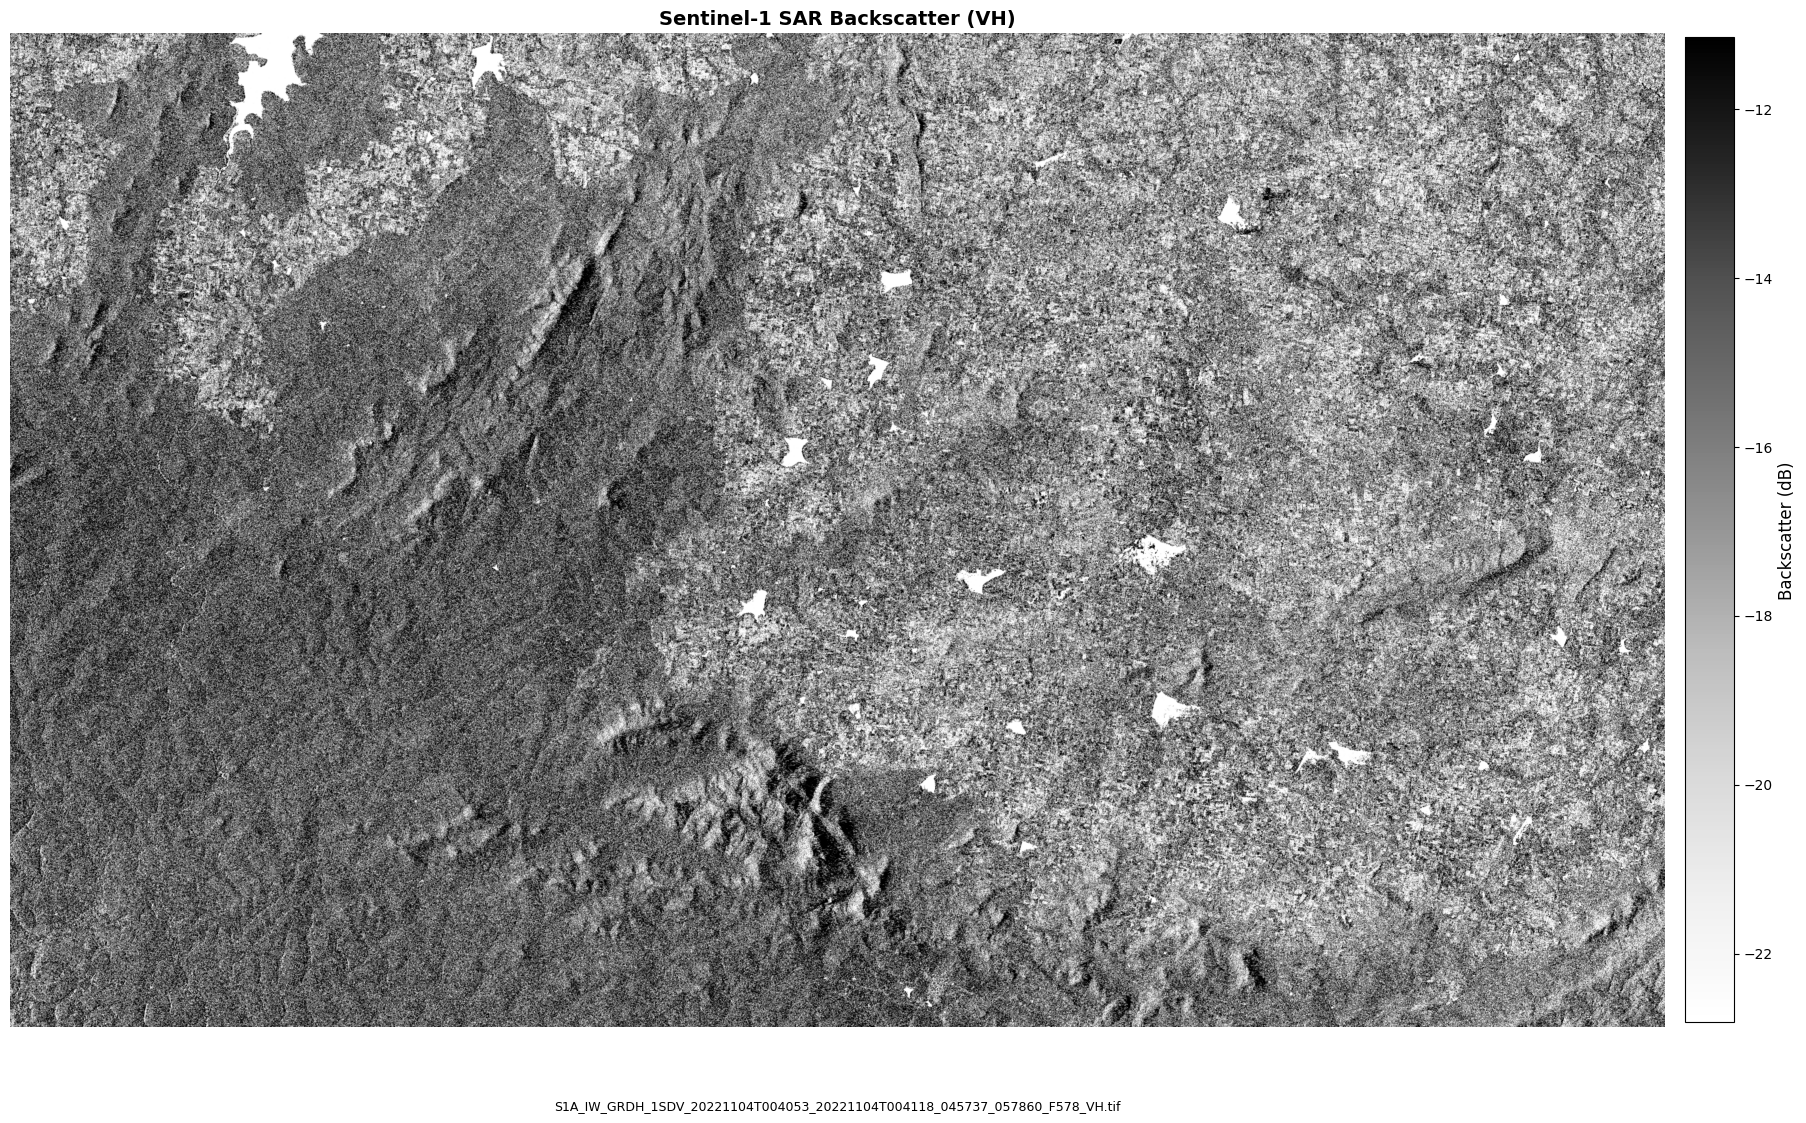

In [7]:
from pathlib import Path
import rasterio
import matplotlib.pyplot as plt
import numpy as np


with rasterio.open(random_file) as src:
    band = src.read(1)
    band = np.where(band <= 0, np.nan, band)
    band_dB = 10 * np.log10(band)

    # Clip outliers to enhance contrast
    vmin, vmax = np.nanpercentile(band_dB, [2, 98])
    band_dB = np.clip(band_dB, vmin, vmax)

    # Plotting
    fig, ax = plt.subplots(figsize=(20, 20))
    cax = ax.imshow(band_dB, cmap='Greys', vmin=vmin, vmax=vmax)
    ax.set_title("Sentinel-1 SAR Backscatter (VH)", fontsize=14, weight='bold')
    ax.axis('off')

    # Add a shorter colorbar
    cbar = fig.colorbar(cax, ax=ax, shrink=0.5, aspect=20, pad=0.01)  # Adjust shrink and aspect
    cbar.set_label('Backscatter (dB)', fontsize=12)
    cbar.ax.tick_params(labelsize=10)


    # Optional: annotate filename at the bottom
    ax.text(0.5, -0.08, random_file.name, ha='center', va='center', fontsize=9, transform=ax.transAxes, wrap=True)

    plt.tight_layout()
    plt.show()


In [11]:
for file in tif_files:
    with rasterio.open(file) as src:
        band = src.read(1)
        print(band.shape)


(3109, 5176)
(3109, 5176)
(3108, 5176)
(3108, 5176)
(3109, 5176)
(3108, 5176)
(3109, 5176)
(3109, 5176)
(3109, 5176)
(3109, 5176)
(3108, 5176)
(3108, 5176)
(3109, 5176)
(3109, 5176)
(3109, 5176)
(3109, 5176)
(3108, 5176)
(3109, 5176)
(3108, 5176)
(3108, 5176)
(3109, 5176)
(3108, 5176)
(3108, 5175)
(3109, 5176)
(3109, 5176)
(3108, 5176)
(3108, 5176)
(3108, 5176)


In [14]:
folder_path_vv = DATA_PATH / folder / vv_folder 

In [16]:
import random

# Get a list of all .tif files in the folder
tif_files = list(folder_path_vv.glob("*.tif"))

if not tif_files:
    print("No GeoTIFF files found.")
else:
    random_file = random.choice(tif_files)


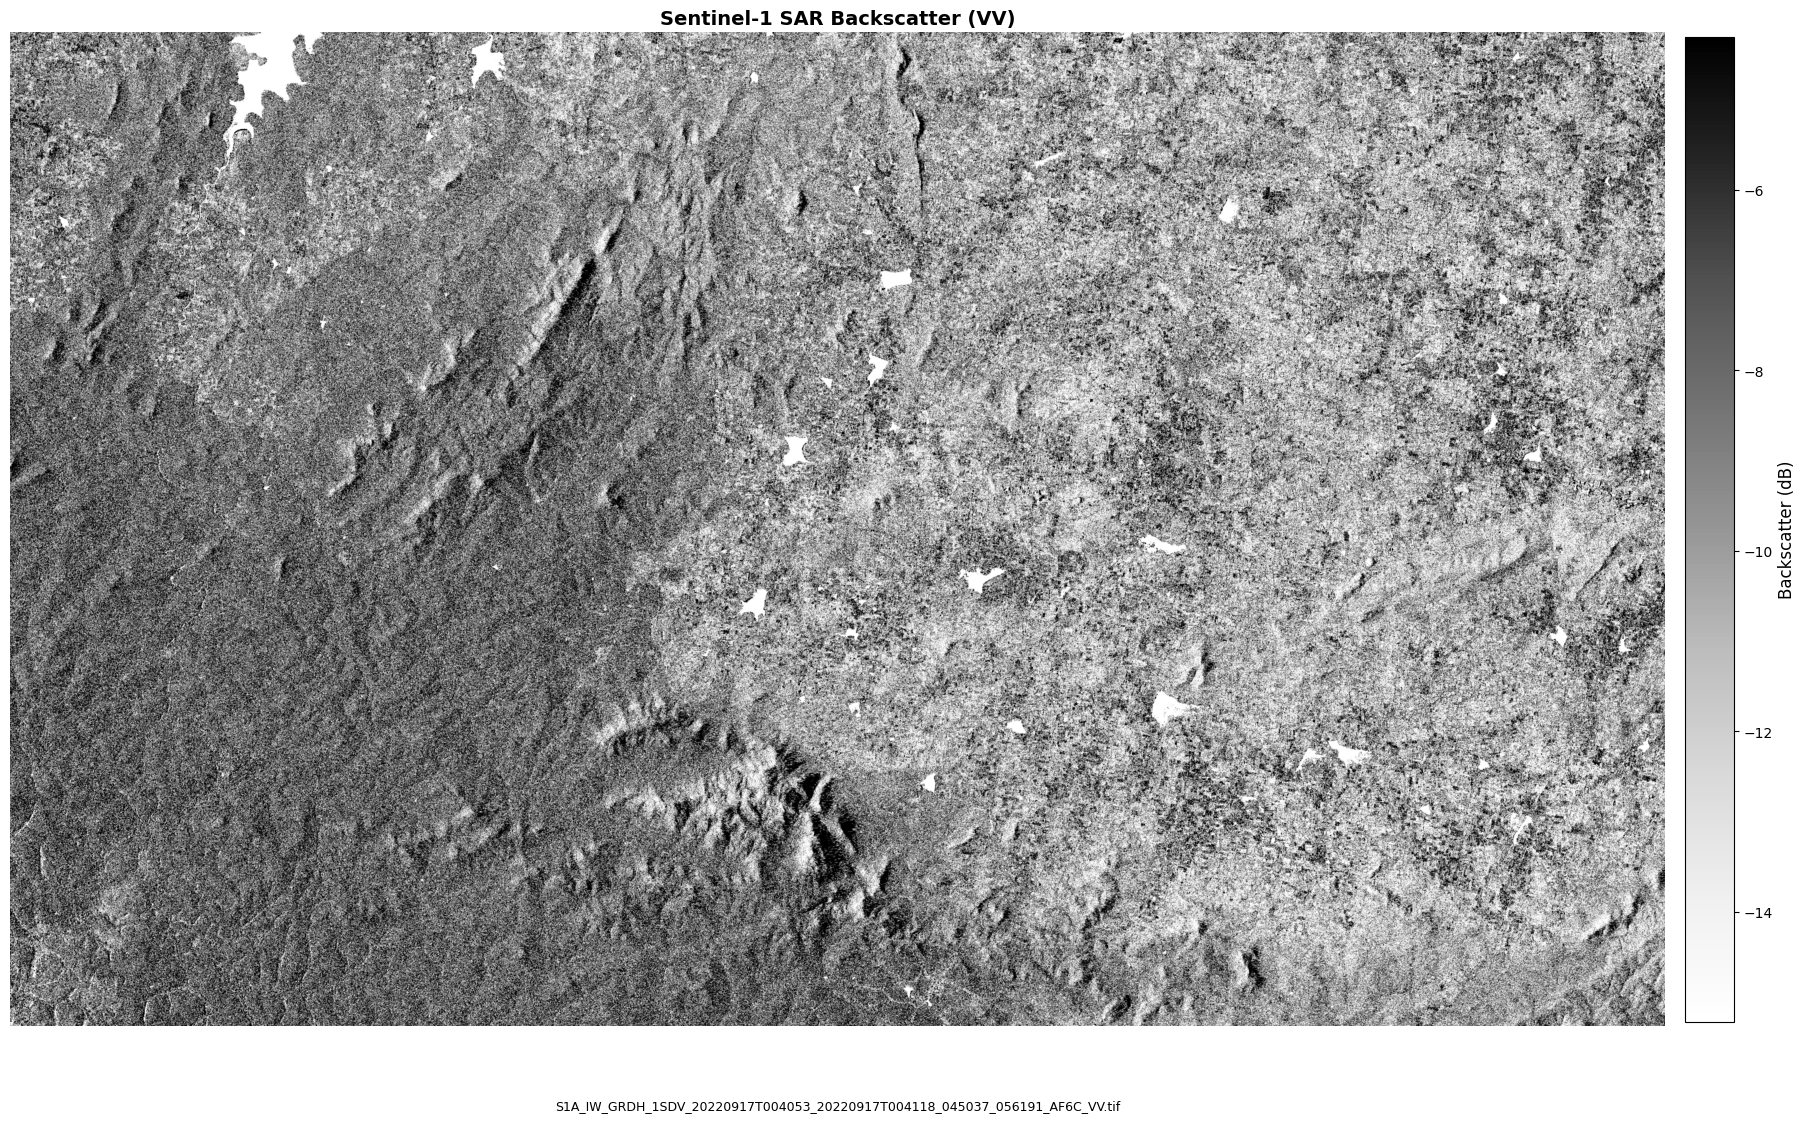

In [17]:
from pathlib import Path
import rasterio
import matplotlib.pyplot as plt
import numpy as np


with rasterio.open(random_file) as src:
    band = src.read(1)
    band = np.where(band <= 0, np.nan, band)
    band_dB = 10 * np.log10(band)

    # Clip outliers to enhance contrast
    vmin, vmax = np.nanpercentile(band_dB, [2, 98])
    band_dB = np.clip(band_dB, vmin, vmax)

    # Plotting
    fig, ax = plt.subplots(figsize=(20, 20))
    cax = ax.imshow(band_dB, cmap='Greys', vmin=vmin, vmax=vmax)
    ax.set_title("Sentinel-1 SAR Backscatter (VV)", fontsize=14, weight='bold')
    ax.axis('off')

    # Add a shorter colorbar
    cbar = fig.colorbar(cax, ax=ax, shrink=0.5, aspect=20, pad=0.01)  # Adjust shrink and aspect
    cbar.set_label('Backscatter (dB)', fontsize=12)
    cbar.ax.tick_params(labelsize=10)


    # Optional: annotate filename at the bottom
    ax.text(0.5, -0.08, random_file.name, ha='center', va='center', fontsize=9, transform=ax.transAxes, wrap=True)

    plt.tight_layout()
    plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display
from skimage.transform import resize  # for fast downsampling

file_path = DATA_PATH / "2020_VH.npy"


# Load the stack
stack = np.load(file_path)
Nt = stack.shape[0]

print(f"Loaded stack with shape: {stack.shape}")

Loaded stack with shape: (29, 3109, 5176)


In [6]:
DOWNSAMPLE_FACTOR = 1  # e.g. 4 = reduce size by 4x
COLORMAP = 'gray'

# -------- Load & Downsample --------
stack_full = np.load(file_path)
Nt, Nx, Ny = stack_full.shape

# Downsample stack for display
stack_small = np.array([
    resize(img, (Nx // DOWNSAMPLE_FACTOR, Ny // DOWNSAMPLE_FACTOR), anti_aliasing=True)
    for img in stack_full
])

print(f"Original shape: {stack_full.shape}")
print(f"Downsampled for display: {stack_small.shape}")

Original shape: (29, 3109, 5176)
Downsampled for display: (29, 3109, 5176)


In [ ]:
# Simple and fast slider viewer
def show_frame(frame_idx):
    plt.figure(figsize=(8, 6))
    plt.imshow(stack_small[frame_idx], cmap=COLORMAP)
    plt.title(f"Frame {frame_idx + 1} / {Nt}")
    plt.axis('off')
    plt.show()

widgets.interact(show_frame, frame_idx=widgets.IntSlider(min=0, max=Nt-1, step=1, value=0));

In [ ]:
# Create interactive slider
frame_slider = widgets.IntSlider(value=0, min=0, max=Nt-1, step=1, description='Frame')

# Optional: dropdown for colormap
colormap_dropdown = widgets.Dropdown(
    options=['gray', 'viridis', 'plasma', 'jet', 'magma'],
    value='gray',
    description='Colormap',
)

# Create output widget to display the image
output = widgets.Output()

# Update function
def update_image(change=None):
    with output:
        output.clear_output(wait=True)

        # Get selected frame
        band = stack[frame_slider.value].astype(np.float32)

        # Replace invalid values
        band = np.where(band <= 0, np.nan, band)

        # Convert to dB scale
        band_dB = 10 * np.log10(band)

        # Clip outliers to enhance contrast
        vmin, vmax = np.nanpercentile(band_dB, [2, 98])
        band_dB = np.clip(band_dB, vmin, vmax)

        # Plotting
        fig, ax = plt.subplots(figsize=(12, 9))
        cax = ax.imshow(band_dB, cmap=colormap_dropdown.value, vmin=vmin, vmax=vmax)
        ax.set_title(f"Frame {frame_slider.value + 1} / {Nt}", fontsize=16)
        ax.axis('off')

        # Optional: Colorbar for interpretation
        cbar = fig.colorbar(cax, ax=ax, shrink=0.6, aspect=20, pad=0.01)
        cbar.set_label('Backscatter (dB)', fontsize=12)
        cbar.ax.tick_params(labelsize=10)

        plt.tight_layout()
        plt.show()


# Link interactions
frame_slider.observe(update_image, names='value')
colormap_dropdown.observe(update_image, names='value')

# Display controls
display(widgets.HBox([frame_slider, colormap_dropdown]))
display(output)

# Initial render
update_image()

Output()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display
import rasterio

# --- Paths ---
file_path = DATA_PATH / "2020_VH.npy"
tif_folder = DATA_PATH / "2020" / "ImagesTif_VH"  # adjust to match where the TIFs are

# --- Load and preprocess the stack ---
stack_raw = np.load(file_path)
Nt = stack_raw.shape[0]
print(f"Loaded stack: {stack_raw.shape}")

# Replace invalids and convert to dB scale
stack_dB = np.where(stack_raw <= 0, np.nan, stack_raw.astype(np.float32))
stack_dB = 10 * np.log10(stack_dB)

# Global contrast clipping (2nd–98th percentile across all images)
vmin, vmax = np.nanpercentile(stack_dB, [2, 98])
stack_dB = np.clip(stack_dB, vmin, vmax)

# --- Get corresponding filenames ---
# Sort filenames to match npy order (assumes alphabetical = temporal)
tif_files = sorted(tif_folder.glob("*.tif"))
if len(tif_files) != Nt:
    print("⚠️ Warning: Number of .tif files does not match number of frames in .npy stack.")
filenames = [f.name for f in tif_files]

# --- Widgets ---
frame_slider = widgets.IntSlider(value=0, min=0, max=Nt-1, step=1, description='Frame')
colormap_dropdown = widgets.Dropdown(
    options=['gray', 'Greys', 'viridis', 'plasma', 'jet', 'magma'],
    value='Greys',
    description='Colormap',
)
output = widgets.Output()

# --- Display function ---
def update_image(change=None):
    with output:
        output.clear_output(wait=True)
        idx = frame_slider.value
        band = stack_dB[idx]

        fig, ax = plt.subplots(figsize=(12, 9))
        cax = ax.imshow(band, cmap=colormap_dropdown.value, vmin=vmin, vmax=vmax)

        # Display filename if available
        title = filenames[idx] if idx < len(filenames) else f"Frame {idx + 1}"
        ax.set_title(f"{title} ({idx + 1}/{Nt})", fontsize=16)
        ax.axis('off')

        cbar = fig.colorbar(cax, ax=ax, shrink=0.6, aspect=20, pad=0.01)
        cbar.set_label('Backscatter (dB)', fontsize=12)
        cbar.ax.tick_params(labelsize=10)

        plt.tight_layout()
        plt.show()

# --- Hook and display ---
frame_slider.observe(update_image, names='value')
colormap_dropdown.observe(update_image, names='value')

display(widgets.HBox([frame_slider, colormap_dropdown]))
display(output)
update_image()

Loaded stack: (29, 3109, 5176)


Output()

In [32]:
print(Nt)

29


In [33]:
print(len(tif_files))

29
